# Train / Test

We'll start by creating some data set that we want to build a model for (in this case a polynomial regression):

array([ 32.84463465,  20.91981094,  18.52967058,  13.57523714,
        33.8791749 ,  59.10283347,  29.99244598,  36.02910295,
        14.63526543,  15.54169321,  11.3329669 ,   6.27204462,
         7.53980633,  17.14641519,  11.78692507,  14.34932395,
         9.74289598,   5.30137384,  56.17491015,   1.92913056,
         9.12278151,  22.14538885,  12.3727088 ,  31.1824224 ,
        27.7979898 ,  31.79604246,  30.71479647,  11.13843928,
        52.74588745,  -1.03549161,  17.05175114,   6.7008825 ,
        32.15673439,  21.76548293,  13.2036894 ,  18.48679142,
         1.57802998,  34.97070043,  21.64599772,  15.18627075,
         2.76780426,  11.25607115,   3.18025615,  -2.63772373,
        33.21465013,  29.69829471,  28.73663603,  12.18174498,
        32.65331968,  22.96928246,  17.00981269,  19.13385068,
        16.44326886,  -4.13202771,  19.89351845,  14.6562293 ,
        35.31724142,  11.90650498,  31.79436483,  32.04430578,
         4.78058753,  27.2503043 ,  12.14337617,   3.71

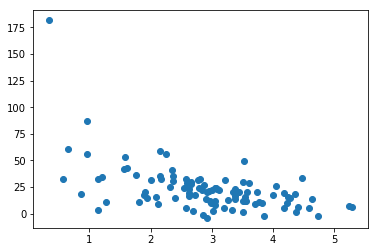

In [98]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds


scatter(pageSpeeds, purchaseAmount)
pageSpeeds
purchaseAmount

Now we'll split the data in two - 80% of it will be used for "training" our model, and the other 20% for testing it. This way we can avoid overfitting.

In [87]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]


Here's our training dataset:

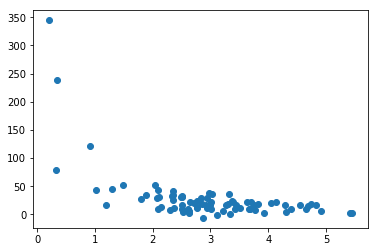

In [88]:
scatter(trainX, trainY)

And our test dataset:

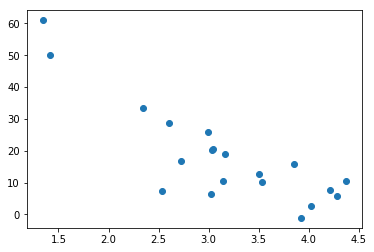

In [89]:
scatter(testX, testY)

Now we'll try to fit an 8th-degree polynomial to this data (which is almost certainly overfitting, given what we know about how it was generated!)

In [90]:
x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x, y, 6))
p4
print(p4)

       6         5       4         3        2
1.088 x - 20.28 x + 149 x - 548.6 x + 1066 x - 1051 x + 456.7


Let's plot our polynomial against the training data:

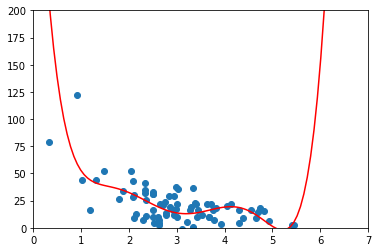

In [91]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()


And against our test data:

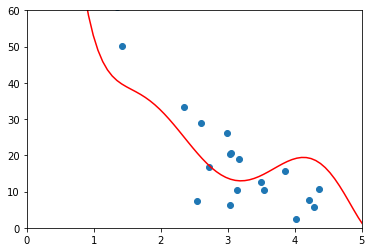

In [92]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,5])
axes.set_ylim([0, 60])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

Doesn't look that bad when you just eyeball it, but the r-squared score on the test data is kind of horrible! This tells us that our model isn't all that great...

In [95]:
from sklearn.metrics import r2_score #Accuracy of your model 

r2 = r2_score(testy, p4(testx))

print(r2)


0.5110172411306761


...even though it fits the training data better:

In [96]:
from sklearn.metrics import r2_score #Accuracy of your model

r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

print(r2)

0.7962796109290677


If you're working with a Pandas DataFrame (using tabular, labeled data,) scikit-learn has built-in train_test_split functions to make this easy to do.

Later we'll talk about even more robust forms of train/test, like K-fold cross-validation - where we try out multiple different splits of the data, to make sure we didn't just get lucky with where we split it.

## Activity

Try measuring the error on the test data using different degree polynomial fits. What degree works best?